In [1]:
import random
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import squarify
import statsmodels
from matplotlib import cm, gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from mpl_toolkits.axes_grid1 import AxesGrid, Grid, make_axes_locatable

In [2]:
# setup seaborn
# palette = sns.color_palette("dark")
# sns.set_theme(
#    context="paper",
#    style="ticks",
#    palette=palette,
#    color_codes=True,
# )

matplotlib.rcParams.update(
    {
        "text.usetex": True,
        "figure.autolayout": True,
        "font.family": "serif",
        "font.size": 16,
        "figure.titlesize": 16,
        "axes.titlesize": 16,
        "axes.labelsize": 16,
        "ytick.labelsize": 14,
        "xtick.labelsize": 14,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
    }
)

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
PGT = "proportional_group_trust"
MTG = "most_trusted_group"
RANDOM = "random"

palette = sns.color_palette("dark", as_cmap=True)

In [4]:
DATA_DIR = Path(".")
plot_dir = Path("plots")
palette = sns.color_palette("Set1", 10)

In [5]:
model_df = pd.read_parquet(f"{DATA_DIR}/model_mean_1000ts.parquet").sort_index()
model_df["cooperators"] /= 10
model_df["migrators"] /= 10

idx = pd.IndexSlice

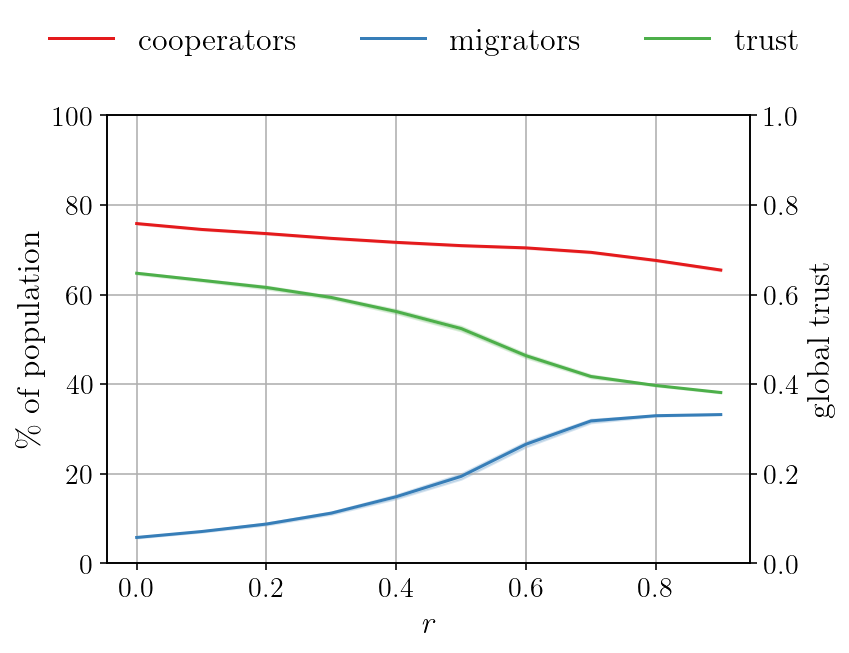

In [6]:
# cooperation/migration/trust vs. different levels of game difficulty
df = (
    model_df.loc[
        idx[PGT, :, 100, 2, 0.5, 0],
    ]
    .reset_index()
    .drop(columns=["ms", "ng", "nt", "th", "mwp"])
)

common_args = {"data": df, "x": "c", "legend": False}

ax = sns.lineplot(**common_args, y="cooperators", color=palette[0], label="cooperators")
sns.lineplot(
    **common_args,
    y="migrators",
    ax=ax,
    color=palette[1],
    label="migrators",
)
ax.set_ylim(0, 100)
ax.set_xlabel("\\textit{r}")
ax.set_ylabel("\% of population")
ax.grid(True)

trust_line = ax.twinx()
sns.lineplot(
    **common_args,
    y="trust",
    ax=trust_line,
    color=palette[2],
    label="trust",
)
trust_line.set_ylim(0, 1)
trust_line.grid(False)
trust_line.set_ylabel("global trust")

ax.figure.legend(ncol=3, bbox_to_anchor=(0.5, 1.0), loc="lower center", frameon=False)
plt.savefig(plot_dir / "cooperation-trust-migration.pdf", bbox_inches="tight")
plt.show()

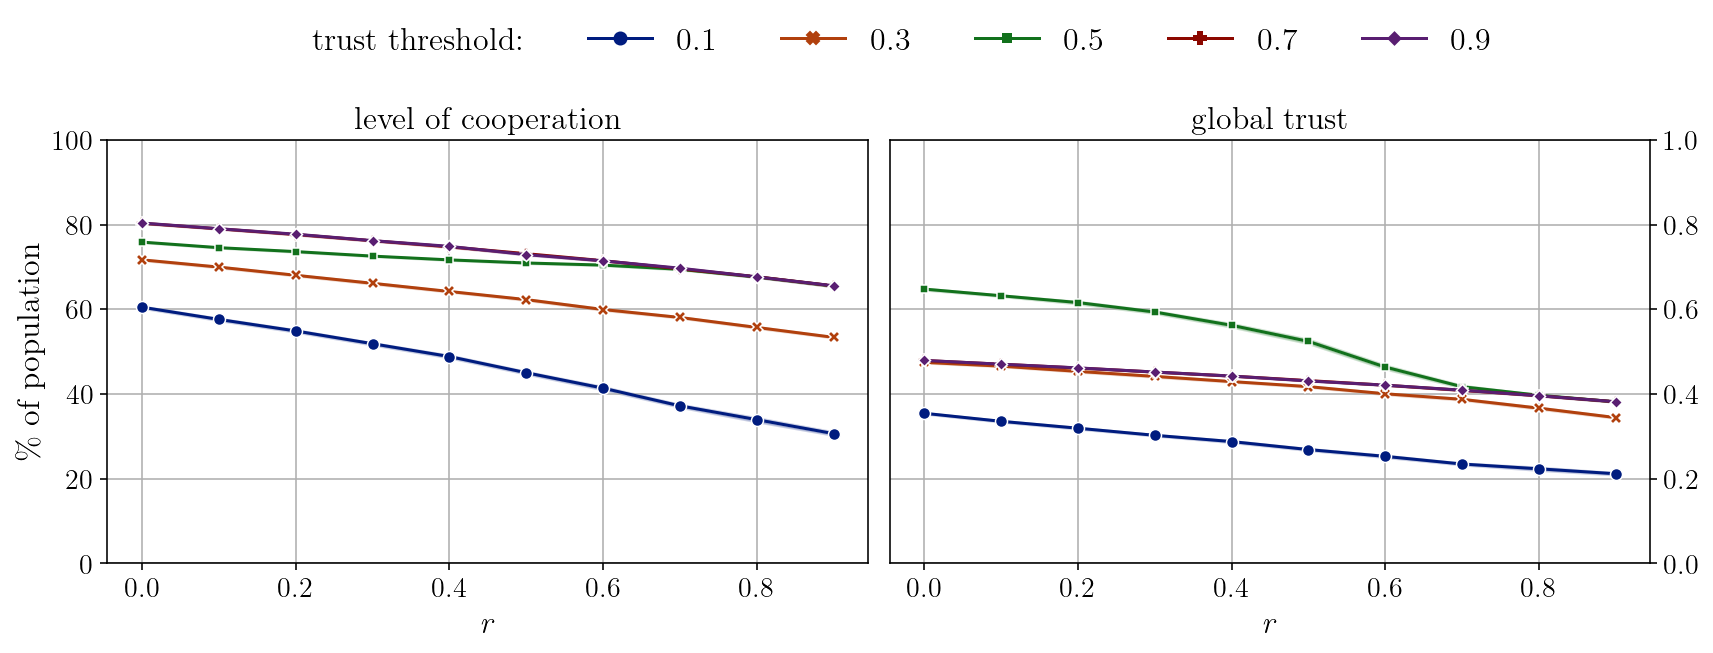

In [8]:
# impact of the trust threshold

df = (
    model_df.loc[
        idx[PGT, :, 100, 2, :, 0],
    ]
    .reset_index()
    .drop(columns=["ms", "ng", "nt"])
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_args = {
    "data": df,
    "x": "c",
    "hue": "th",
    "style": "th",
    "dashes": False,
    "markers": True,
    "palette": "dark",
}

sns.lineplot(
    **plot_args,
    y="cooperators",
    ax=ax1,
    legend=True,
)
ax1.grid(True)
ax1.set_ylim(0, 100)
ax1.set_xlabel("\\textit{r}")
ax1.set_ylabel("\% of population")
ax1.set_title("level of cooperation")

sns.lineplot(
    **plot_args,
    y="trust",
    ax=ax2,
    legend=False,
)
ax2.grid(True)
ax2.set_ylim(0, 1)
ax2.set_xlabel("\\textit{r}")
ax2.set_ylabel("")
ax2.set_title("global trust")
ax2.yaxis.tick_right()

handles, labels = ax1.get_legend_handles_labels()
handles = [plt.plot([], marker="", ls="")[0]] + handles
labels = ["trust threshold: "] + labels
fig.legend(
    handles, labels, ncol=6, bbox_to_anchor=(0.5, 1), loc="lower center", frameon=False
)
ax1.get_legend().remove()

fig.tight_layout()
plt.savefig(plot_dir / "impact-of-trust-threshold.pdf", bbox_inches="tight")
plt.show()

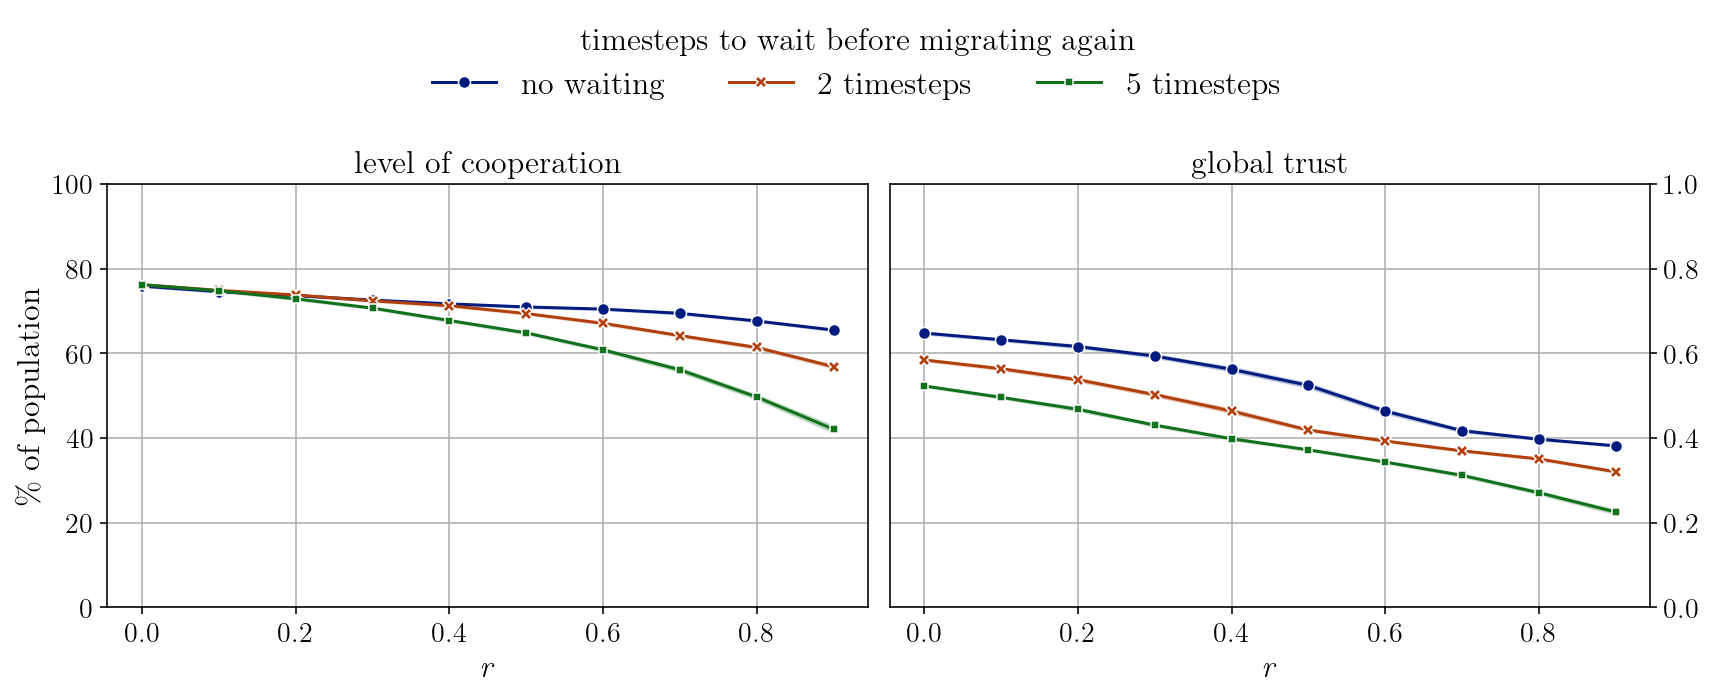

In [10]:
# impact of waiting before migrating

df = (
    model_df.loc[
        idx[PGT, :, 100, 2, 0.5, :],
    ]
    .reset_index()
    .drop(columns=["ms", "ng", "nt", "th"])
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_args = {
    "data": df,
    "x": "c",
    "hue": "mwp",
    "style": "mwp",
    "legend": False,
    "dashes": False,
    "markers": True,
    "palette": "dark",
}

sns.lineplot(
    **plot_args,
    y="cooperators",
    ax=ax1,
)
ax1.grid(True)
ax1.set_ylim(0, 100)
ax1.set_xlabel("\\textit{r}")
ax1.set_ylabel("\% of population")
ax1.set_title("level of cooperation")

sns.lineplot(
    **plot_args,
    y="trust",
    ax=ax2,
)
ax2.grid(True)
ax2.set_ylim(0, 1)
ax2.set_xlabel("\\textit{r}")
ax2.set_ylabel("")
ax2.set_title("global trust")
ax2.yaxis.tick_right()

handles = ax1.get_lines()
labels = ["no waiting", "2 timesteps", "5 timesteps"]
fig.legend(
    handles,
    labels,
    ncol=3,
    bbox_to_anchor=(0.5, 1),
    loc="lower center",
    frameon=False,
    title="timesteps to wait before migrating again",
)

fig.tight_layout()
plt.savefig(plot_dir / "migration-wait-periods.pdf", bbox_inches="tight")
plt.show()

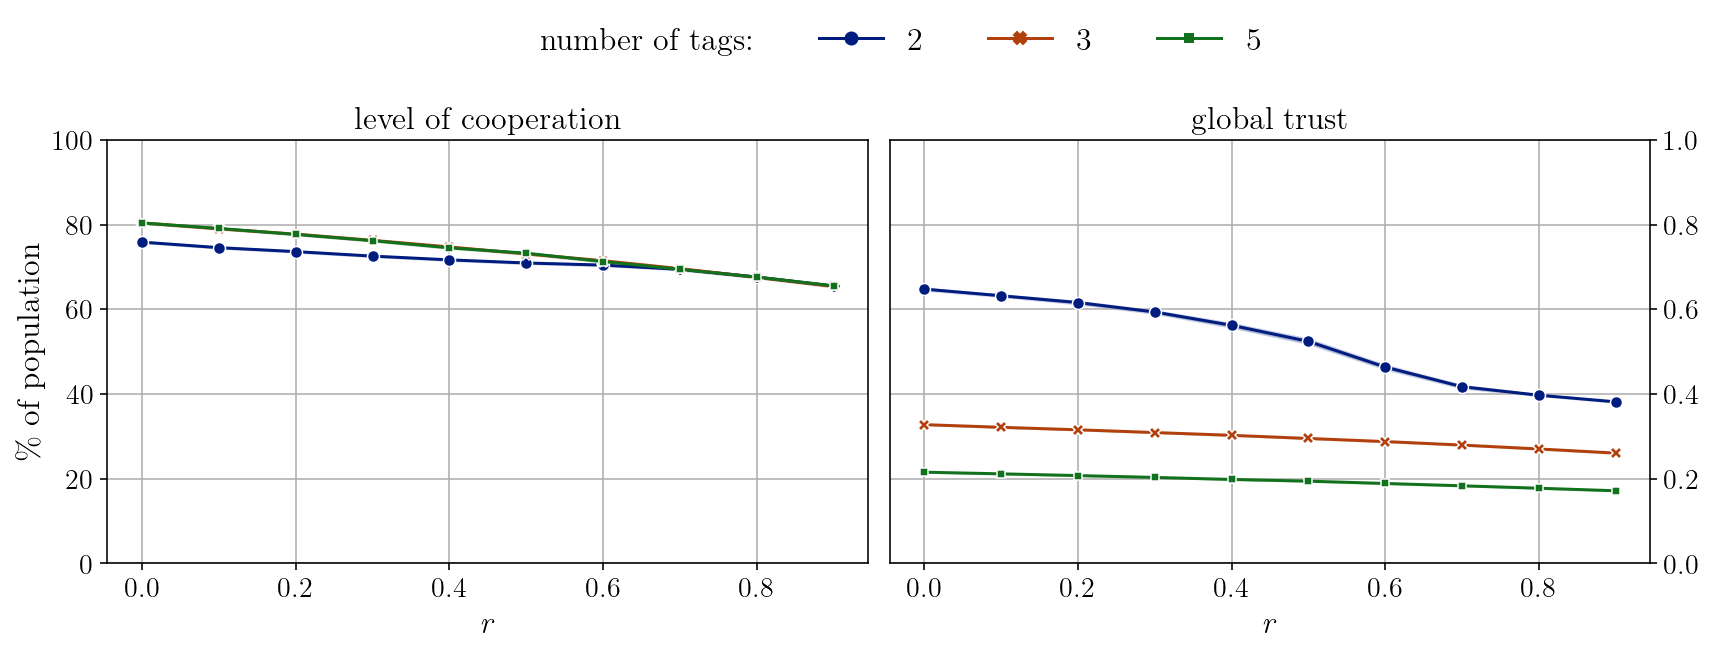

In [11]:
df = model_df.loc[
    idx[PGT, :, 100, :, 0.5, 0],
].reset_index()
df["nt"] = df["nt"].astype("uint8")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_args = {
    "data": df,
    "x": "c",
    "hue": "nt",
    "style": "nt",
    "dashes": False,
    "markers": True,
    "palette": "dark",
}

sns.lineplot(
    **plot_args,
    y="cooperators",
    ax=ax1,
    legend=True,
)
ax1.grid(True)
ax1.set_ylim(0, 100)
ax1.set_xlabel("\\textit{r}")
ax1.set_ylabel("\% of population")
ax1.set_title("level of cooperation")

sns.lineplot(
    **plot_args,
    y="trust",
    ax=ax2,
    legend=False,
)
ax2.grid(True)
ax2.set_ylim(0, 1)
ax2.set_xlabel("\\textit{r}")
ax2.set_ylabel("")
ax2.set_title("global trust")
ax2.yaxis.tick_right()

handles, labels = ax1.get_legend_handles_labels()
handles = [plt.plot([], marker="", ls="")[0]] + handles
labels = ["number of tags: "] + labels
fig.legend(
    handles, labels, ncol=4, bbox_to_anchor=(0.5, 1), loc="lower center", frameon=False
)
ax1.get_legend().remove()

fig.tight_layout()
plt.savefig(plot_dir / "impact-of-number-of-tags.pdf", bbox_inches="tight")
plt.show()

In [13]:
tags_df = pd.read_parquet("tags_mean_1000ts.parquet")

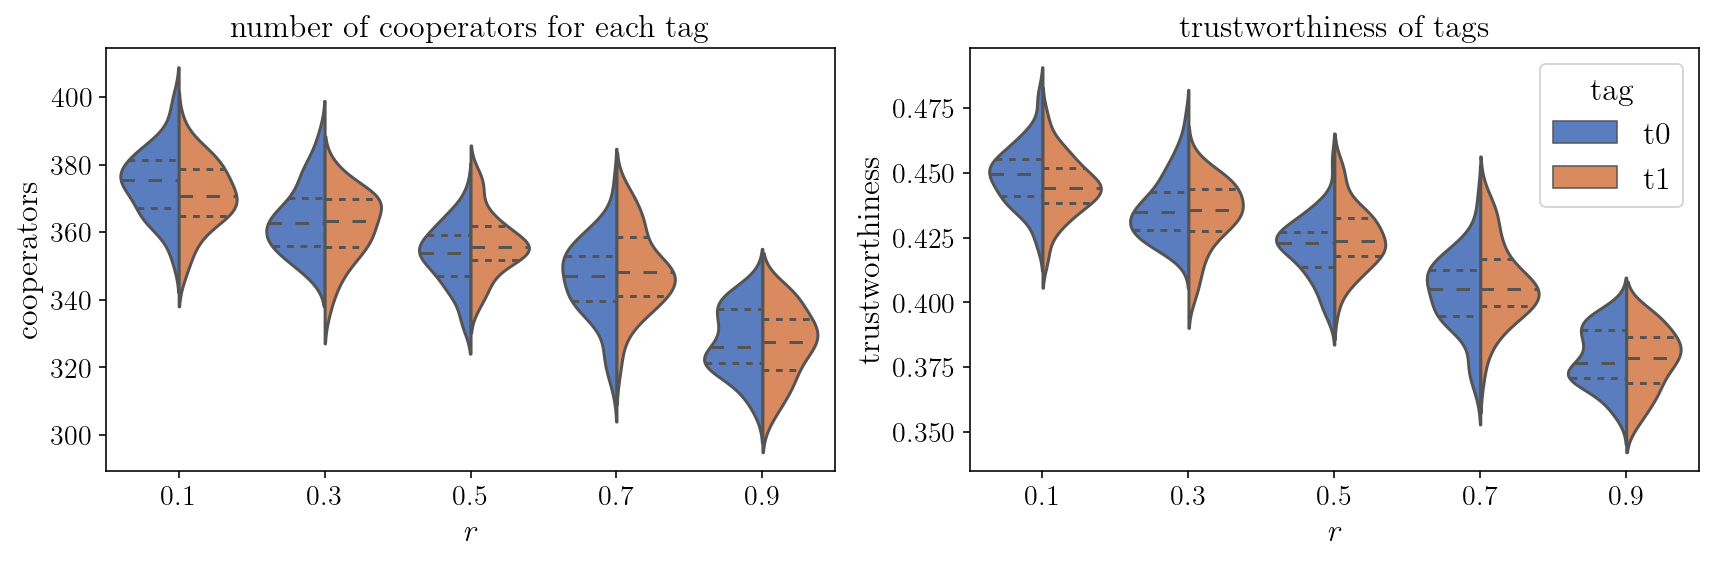

In [14]:
# how different tags have different levels of trustworthines and cooperation

df = tags_df.loc[idx[PGT, [0.1, 0.3, 0.5, 0.7, 0.9], 100, 2, 0.5, 0]].reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.violinplot(
    x="c",
    y="cooperators",
    hue="tag",
    data=df,
    palette="muted",
    split=True,
    ax=ax1,
    inner="quartile",
)
ax1.set_xlabel("\\textit{r}")
ax1.set_title("number of cooperators for each tag")
ax1.get_legend().remove()

sns.violinplot(
    x="c",
    y="trustworthiness",
    hue="tag",
    data=df,
    palette="muted",
    split=True,
    ax=ax2,
    inner="quartile",
)
ax2.set_xlabel("\\textit{r}")
ax2.set_title("trustworthiness of tags")

fig.tight_layout()
plt.savefig(plot_dir / "cooperation-trust-for-2-tags.pdf", bbox_inches="tight")
plt.show()

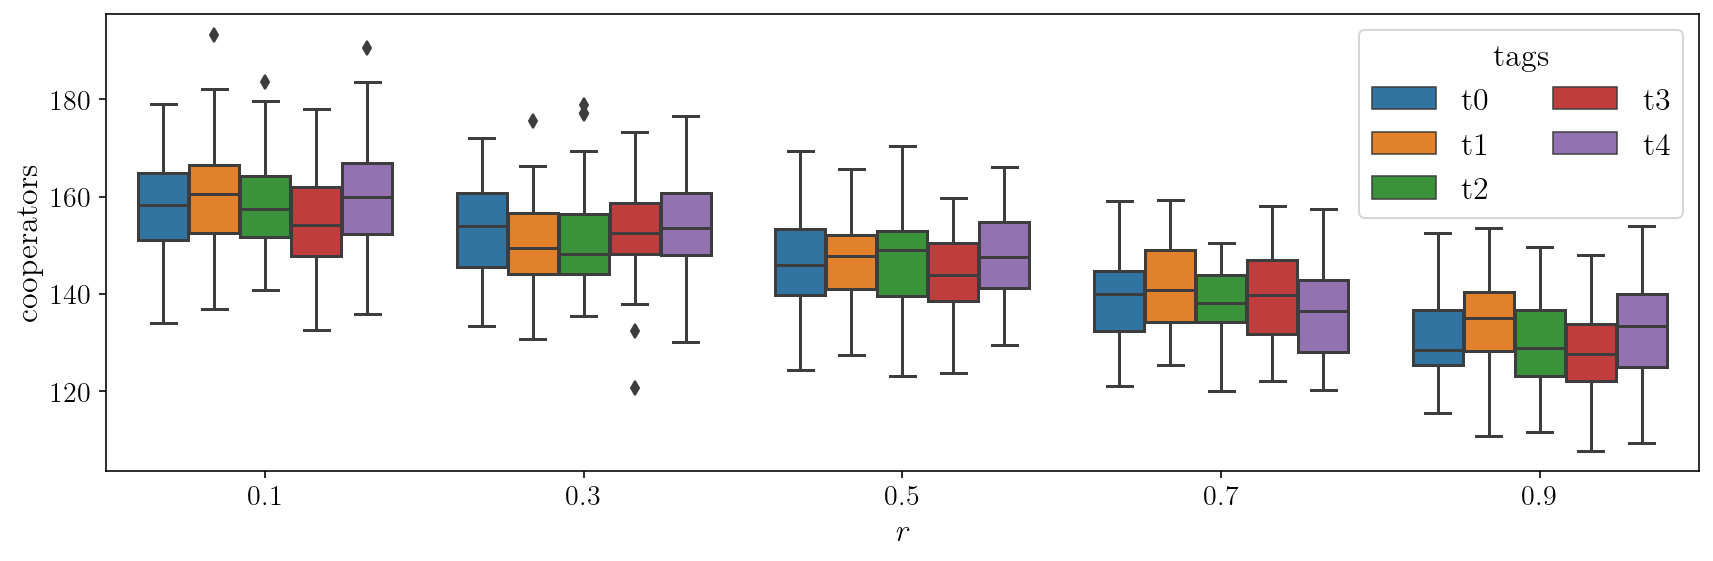

In [15]:
df = tags_df.loc[idx[PGT, [0.1, 0.3, 0.5, 0.7, 0.9], 100, 5, 0.5, 0]].reset_index()

f, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.boxplot(data=df, x="c", y="cooperators", hue="tag", ax=ax)
ax.set_xlabel("\\textit{r}")

ax.legend(ncol=2, title="tags")
fig.tight_layout()
plt.savefig(
    plot_dir / "distribution-of-cooperation-for-5-tags.pdf", bbox_inches="tight"
)
plt.show()

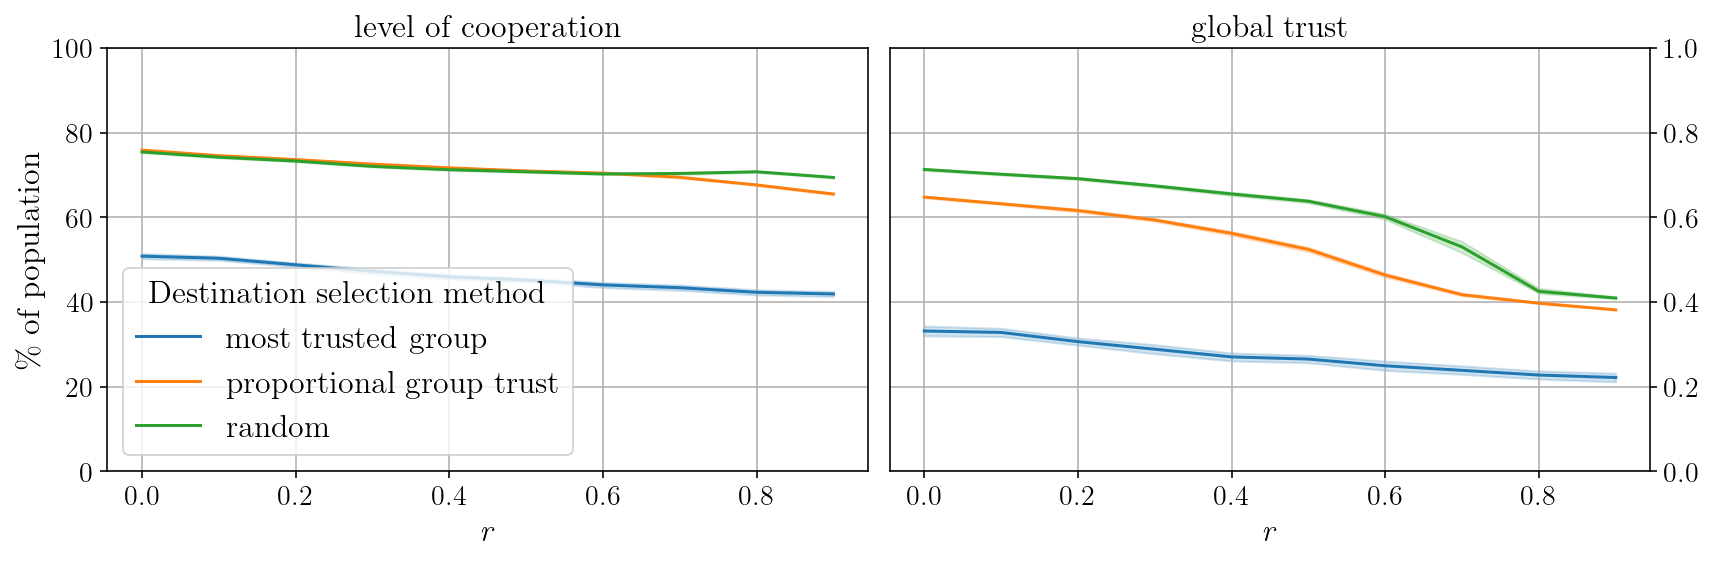

In [16]:
df = model_df.loc[idx[:, :, 100, 2, 0.5, 0]].reset_index()
df = df.replace(
    {
        "ms": {
            "most_trusted_group": "most trusted group",
            "proportional_group_trust": "proportional group trust",
        }
    }
)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.lineplot(data=df, x="c", y="cooperators", hue="ms", ax=ax1)
ax1.grid(True)
ax1.set_ylim(0, 100)
ax1.set_xlabel("\\textit{r}")
ax1.set_ylabel("\% of population")
ax1.set_title("level of cooperation")

sns.lineplot(data=df, x="c", y="trust", hue="ms", ax=ax2)
ax2.grid(True)
ax2.set_ylim(0, 1)
ax2.set_xlabel("\\textit{r}")
ax2.set_ylabel("")
ax2.set_title("global trust")
ax2.yaxis.tick_right()

ax2.get_legend().remove()
ax1.get_legend().set_title("Destination selection method")

fig.tight_layout()
plt.savefig(
    plot_dir / "destination-selection-methods-comparison.pdf", bbox_inches="tight"
)
plt.show()

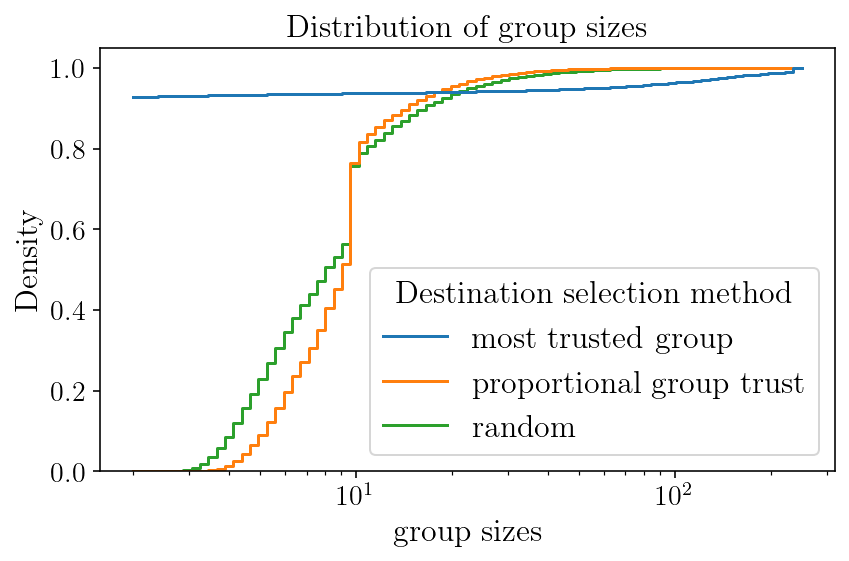

In [17]:
group_df = pd.read_parquet("group_mean_1000ts.parquet")

df = group_df.loc[idx[:, :, :, 100, 2, 0.5, 0]].reset_index()[["ms", "size"]]
df = df.replace(
    {
        "ms": {
            "most_trusted_group": "most trusted group",
            "proportional_group_trust": "proportional group trust",
        }
    }
)

ax = sns.histplot(
    data=df,
    x="size",
    hue="ms",
    log_scale=True,
    element="step",
    fill=False,
    cumulative=True,
    stat="density",
    common_norm=False,
)
ax.set_title("Distribution of group sizes")
ax.set_xlabel("group sizes")
ax.get_legend().set_title("Destination selection method")

fig.tight_layout()
plt.savefig(plot_dir / "group-size-vs-destination-selection.pdf", bbox_inches="tight")
plt.show()

Generally there is no difference in the level of cooperation obtained by the 'random' and the 'proportional group trust' strategies: they mostly provide >70% cooperation even as the game difficulty increases. The 'most trusted group' strategy does not perform very well, however, and the level of cooperation ranges between 41-50% for different levels of game difficulty. We suspected that the 'most trusted group' strategy did not peform as well becuase the population might have evolved to have some large groups and many very small groups, situations where the action is a coin toss. We analysed the distribution of group sizes for all three strategies, and the results are plotted in Figure <<>>. The results show that with the 'most trusted group' strategy, most groups have the minimum number of agents (2) since most agents migrate to a few groups that are regarded as 'most trusted' neighbouring groups. However, in the case of the 'proportional group trust' and 'random' strategies, most group sizes are close to the mean group size (10) and only a few are large groups. Inferring to levels of cooperation obtained with these strategies, it appears that a more uniform distribution of group sizes, or a uniform distribution of agents in groups within the population, is more conducive for the promotion of cooperation.

The global trust obtained with the most trusted group strategy is similarly significantly less than that achieved with proportional group trust and random strategies. Both the random and 'proportional group trust' randomly select a destination group, but PGT is more restrictive because the trust in the destination group has to be more than the current group. Since agents seek migration only when they do not have enough trust in the current group, not allowing agents to migrate immediately leads to lower trust. This result is in line with the earlier results that showed that disallowing migration immediately after migrating in the previous timestep led to deterioration in the trust (see ...). The level of trust is the lowes with the MTG strategy. Even though agents always migrate once they have decided to seek migration with this strategy, as discussed above (see Figure ...), this leads to many very small groups and a few large groups. It appears that this skewed distribution is not conducive for promoting trust in the system.

Therefore, we can conclude from the above discussion that two conditions are required for promoting high levels of cooperation and trust in the system: agents should be allowed to migrate once they do not have enough trust in their group, and the destination selection strategy should be able to maintain a relatively uniform distribution of group sizes.

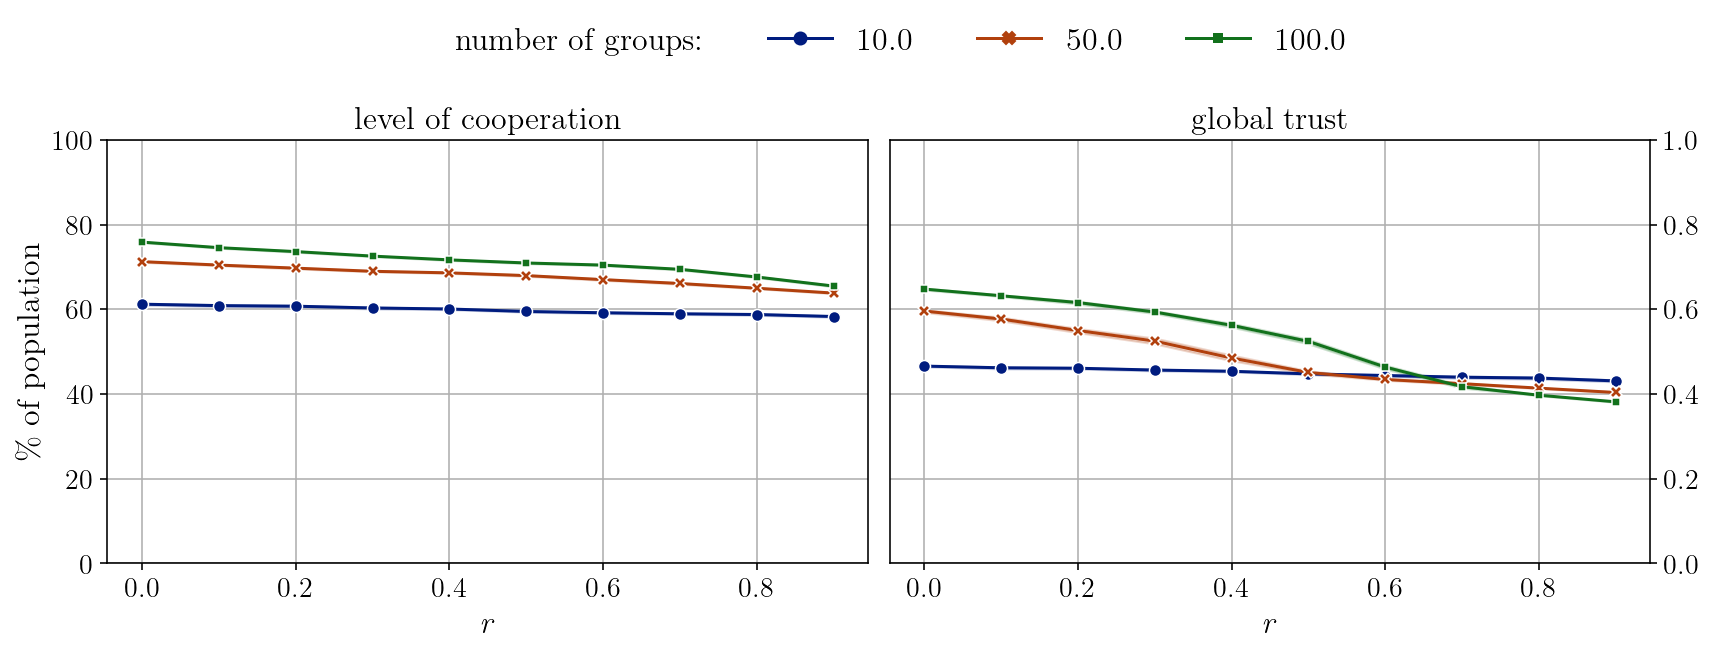

In [18]:
df = model_df.loc[
    idx[PGT, :, :, 2, 0.5, 0],
].reset_index()
df["nt"] = df["nt"].astype("uint8")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_args = {
    "data": df,
    "x": "c",
    "hue": "ng",
    "style": "ng",
    "dashes": False,
    "markers": True,
    "palette": "dark",
}

sns.lineplot(
    **plot_args,
    y="cooperators",
    ax=ax1,
    legend=True,
)
ax1.grid(True)
ax1.set_ylim(0, 100)
ax1.set_xlabel("\\textit{r}")
ax1.set_ylabel("\% of population")
ax1.set_title("level of cooperation")

sns.lineplot(
    **plot_args,
    y="trust",
    ax=ax2,
    legend=False,
)
ax2.grid(True)
ax2.set_ylim(0, 1)
ax2.set_xlabel("\\textit{r}")
ax2.set_ylabel("")
ax2.set_title("global trust")
ax2.yaxis.tick_right()

handles, labels = ax1.get_legend_handles_labels()
handles = [plt.plot([], marker="", ls="")[0]] + handles
labels = ["number of groups: "] + labels
fig.legend(
    handles, labels, ncol=4, bbox_to_anchor=(0.5, 1), loc="lower center", frameon=False
)
ax1.get_legend().remove()

fig.tight_layout()
plt.savefig(plot_dir / "impact-of-group-sizes.pdf", bbox_inches="tight")
plt.show()

In [19]:
# get data about tags in each group for all simulations - at the end of the simulation
tags_in_groups_df = pd.read_parquet("tags_in_groups_final_timestep.parquet")
tags_in_groups_df.loc[:, "total"] = tags_in_groups_df.sum(axis="columns")

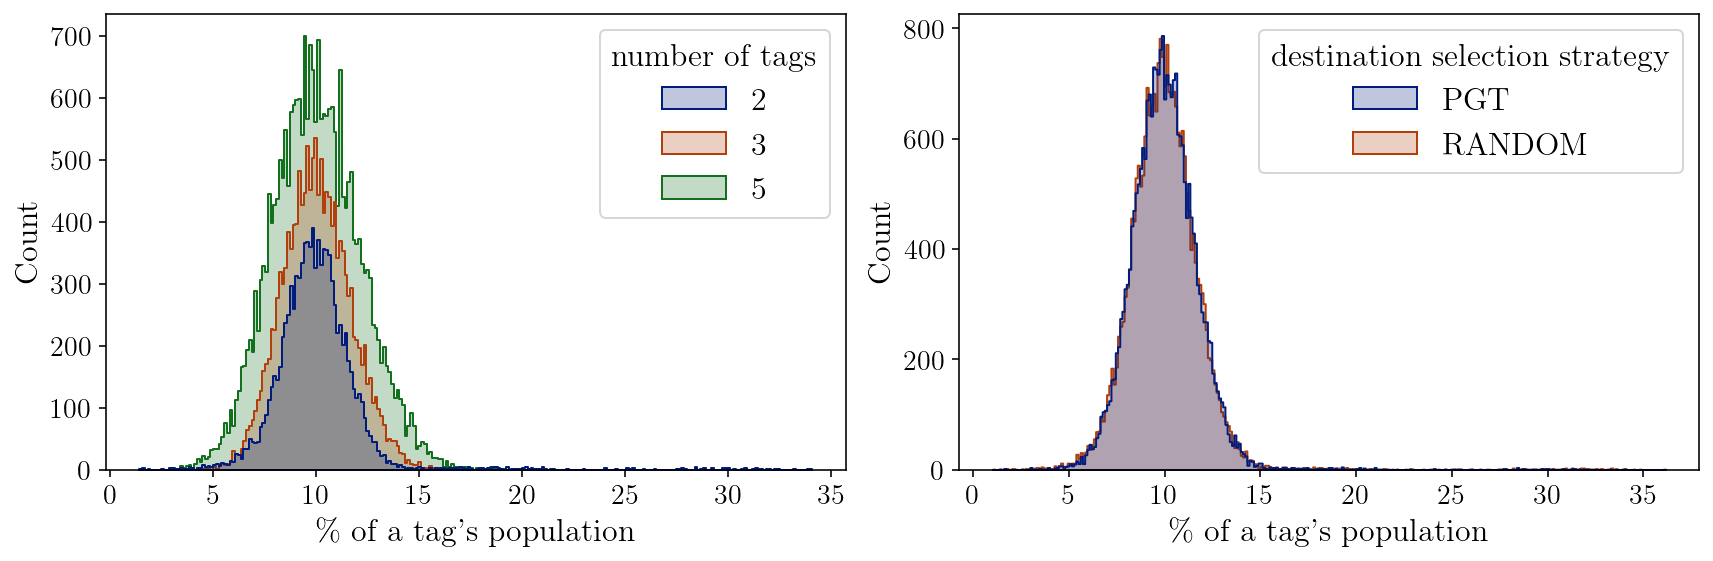

In [20]:
def to_percent(group_sizes):
    total = group_sizes[-1]
    return [x * 100 / total for x in group_sizes[:-1]]


# we're interested in the % of the total population of each tag in each group
df = (
    tags_in_groups_df.apply(to_percent, axis="columns", result_type="expand")
    .astype("float32")
    .sort_index()
)

df = (df
      .loc[idx[:, [PGT, RANDOM], :, 10, [2, 3, 5], 0.5, 0, ], list(range(10))]
      .melt(var_name="group", value_name="percent of tag", ignore_index=False)
      .reset_index(level=["ng", "th", "mwp", "timestep"], drop=True)
      .rename(
        index={
            "proportional_group_trust": "PGT",
            "most_trusted_group": "MTG",
            "random": "RANDOM",
        })
      .sort_index()
     )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_args = {
    'x': "percent of tag",
    'multiple': "layer",
    'palette': 'dark',
    'element': 'step',
}
sns.histplot(
    data=df.query('ms == "PGT"'),
    hue="nt",
    ax=ax1,
    **plot_args
)
ax1.get_legend().set_title("number of tags")
ax1.set_xlabel("\% of a tag's population")

sns.histplot(
    data=df.query("nt < 5"),
    hue="ms",
    ax=ax2,
    **plot_args
)
ax2.get_legend().set_title("destination selection strategy")
ax2.set_xlabel("\% of a tag's population")

plt.savefig(plot_dir / "distribution-of-tags-in-groups.pdf", bbox_inches="tight")
plt.show()

In order to find out if agents with the same tag were congregating within certain groups, we analysed the percentage of a tag's total population across all groups at the end of the simulation. 
Figure xxx shows a histogram plot for the percentage of a tag's total population found in each group when the number of groups was 10,  trust threshold was 0.5, migration wait period was 0 and the PGT destination selection method was used. We can see from the figure that a vast majority of any tag's population within a group was in the range 8-12%, meaning that the tag population was evenly spread across the groups. This was also true even when different number of tags were used in the simulation.

In [237]:
mdf = pd.read_parquet("most_trusted_tags_in_groups.parquet")
mdf.loc[:, "total"] = mdf.sum(axis="columns")
mdf = (
    mdf.apply(to_percent, axis="columns", result_type="expand")
    .astype("float32")
    .sort_index()
)
mdf = mdf.reset_index().astype(
    {
        "c": "float64",
        "ng": "int64",
        "nt": "int64",
        "th": "float64",
        "mwp": "int64",
        "timestep": "int64",
    }
)
mdf = mdf.set_index(["run", "ms", "c", "ng", "nt", "th", "mwp", "tag", "timestep"])

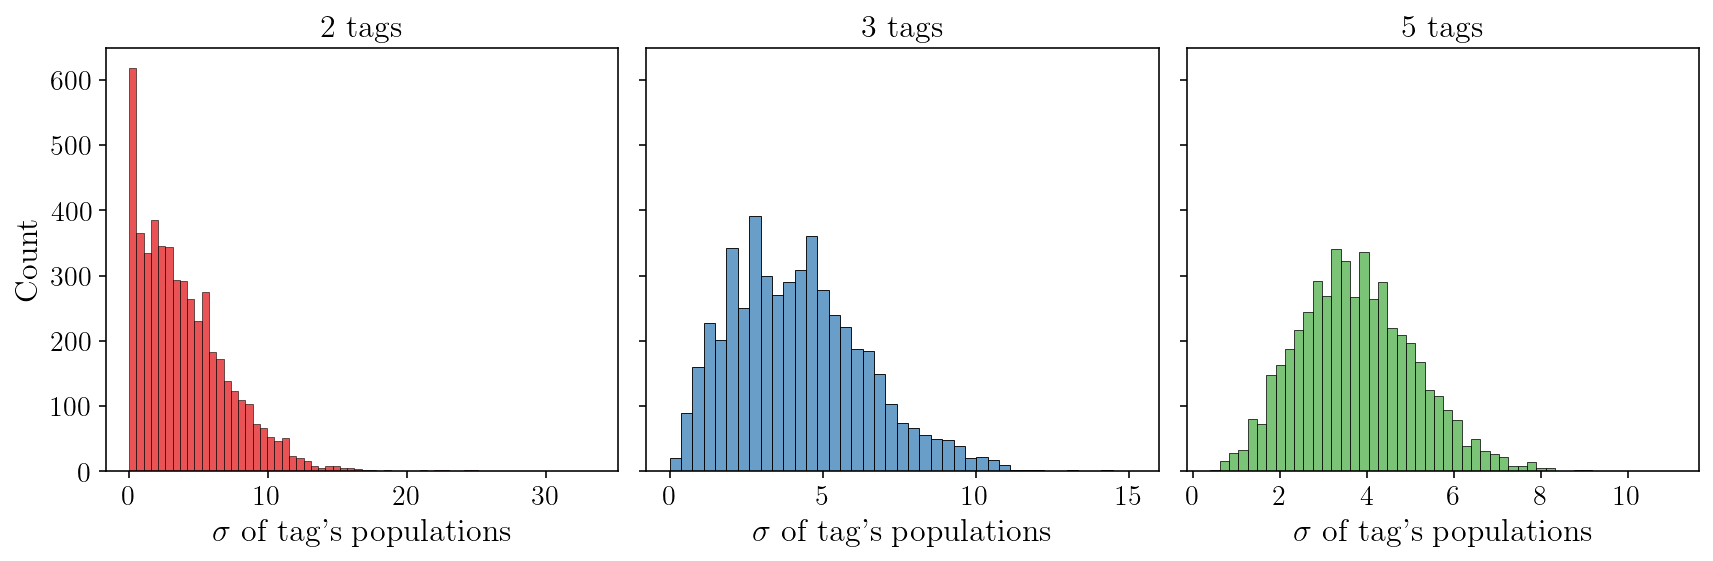

In [26]:
df = (
    tags_in_groups_df
    .loc[idx[:, PGT, :, 10, [2, 3,5], 0.5, 2, ], [str(x) for x in list(range(10))]]
    .reset_index(level=['ng', 'ms', 'th', 'mwp', 'timestep'], drop=True)
    .stack()
    .unstack(level='tag')
    .rename_axis(index={None: 'group'})
)
df = df.apply(np.std, axis='columns').to_frame().rename(columns={0: 'stdev'}).reset_index(level=['group'], drop=False)

fig, axes = plt.subplots(1,3, figsize=(12,4), sharey=True)

sns.histplot(data=df.query('nt == 2'), x='stdev', ax=axes[0], color=palette[0])
sns.histplot(data=df.query('nt == 3'), x='stdev', ax=axes[1], color=palette[1])
sns.histplot(data=df.query('nt == 5'), x='stdev', ax=axes[2], color=palette[2])

for ax,nt in zip(axes, [2, 3, 5]):
    ax.set_title(f'{nt} tags')
    ax.set_xlabel("$\sigma$ of tag's populations")
    
plt.savefig(plot_dir / "distribution-of-tags-within-groups.pdf", bbox_inches="tight")
plt.show()